In [1]:
import pandas as pd
import numpy as np

In [14]:
movies = pd.read_csv("movies.csv")

In [18]:
ratings = pd.read_csv("ratings.csv")

In [19]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [20]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [52]:
data = pd.merge(ratings,movies, on="movieId")

In [53]:
data.shape

(105339, 6)

In [54]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
 4   title      105339 non-null  object 
 5   genres     105339 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [56]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [57]:
data.duplicated().sum()

np.int64(0)

In [58]:
#removing timestamp columns which bascally not needed 
if 'timestamp' in data.columns:
    data = data.drop('timestamp', axis=1)

In [59]:
data

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
105334,668,142488,4.0,Spotlight (2015),Thriller
105335,668,142507,3.5,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,Bone Tomahawk (2015),Horror|Western


In [60]:
data['genres'].head()

0                Crime|Drama
1               Drama|Sci-Fi
2    Mystery|Sci-Fi|Thriller
3           Mystery|Thriller
4     Crime|Mystery|Thriller
Name: genres, dtype: object

In [81]:
data['genres'] = data['genres'].str.split('|')

In [82]:
data

,userId,movieId,rating,title,genres,year,clean_title
0,1,16,4.0,Casino (1995),"[Crime, Drama]",1995.0,Casino
1,1,24,1.5,Powder (1995),"[Drama, Sci-Fi]",1995.0,Powder
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995.0,Twelve Monkeys (a.k.a. 12 Monkeys)
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995.0,Seven (a.k.a. Se7en)
4,1,50,4.0,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995.0,"Usual Suspects, The"
...,...,...,...,...,...,...,...
105334,668,142488,4.0,Spotlight (2015),[Thriller],2015.0,Spotlight
105335,668,142507,3.5,Pawn Sacrifice (2015),[Drama],2015.0,Pawn Sacrifice
105336,668,143385,4.0,Bridge of Spies (2015),"[Drama, Thriller]",2015.0,Bridge of Spies
105337,668,144976,2.5,Bone Tomahawk (2015),"[Horror, Western]",2015.0,Bone Tomahawk


In [83]:
data['year']=data['title'].str.extract(r'\((\d{4})\)')
data['year']=pd.to_numeric(data['year'],errors='coerce')

In [84]:
data

,userId,movieId,rating,title,genres,year,clean_title
0,1,16,4.0,Casino (1995),"[Crime, Drama]",1995.0,Casino
1,1,24,1.5,Powder (1995),"[Drama, Sci-Fi]",1995.0,Powder
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995.0,Twelve Monkeys (a.k.a. 12 Monkeys)
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995.0,Seven (a.k.a. Se7en)
4,1,50,4.0,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995.0,"Usual Suspects, The"
...,...,...,...,...,...,...,...
105334,668,142488,4.0,Spotlight (2015),[Thriller],2015.0,Spotlight
105335,668,142507,3.5,Pawn Sacrifice (2015),[Drama],2015.0,Pawn Sacrifice
105336,668,143385,4.0,Bridge of Spies (2015),"[Drama, Thriller]",2015.0,Bridge of Spies
105337,668,144976,2.5,Bone Tomahawk (2015),"[Horror, Western]",2015.0,Bone Tomahawk


In [85]:
data['clean_title']=data['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

In [86]:
data

,userId,movieId,rating,title,genres,year,clean_title
0,1,16,4.0,Casino (1995),"[Crime, Drama]",1995.0,Casino
1,1,24,1.5,Powder (1995),"[Drama, Sci-Fi]",1995.0,Powder
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995.0,Twelve Monkeys (a.k.a. 12 Monkeys)
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995.0,Seven (a.k.a. Se7en)
4,1,50,4.0,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995.0,"Usual Suspects, The"
...,...,...,...,...,...,...,...
105334,668,142488,4.0,Spotlight (2015),[Thriller],2015.0,Spotlight
105335,668,142507,3.5,Pawn Sacrifice (2015),[Drama],2015.0,Pawn Sacrifice
105336,668,143385,4.0,Bridge of Spies (2015),"[Drama, Thriller]",2015.0,Bridge of Spies
105337,668,144976,2.5,Bone Tomahawk (2015),"[Horror, Western]",2015.0,Bone Tomahawk


In [87]:
data.dtypes

userId           int64
movieId          int64
rating         float64
title           object
genres          object
year           float64
clean_title     object
dtype: object

In [88]:
#converting year  to int 
data['year'] = data['year'].astype('Int64')

In [89]:
data.dtypes

userId           int64
movieId          int64
rating         float64
title           object
genres          object
year             Int64
clean_title     object
dtype: object

In [92]:
#Group all rows by movie title and compute mean rating.
avg_rating =data.groupby('title')['rating'].mean()
avg_rating.head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [93]:
avg_rating = avg_rating.to_frame(name='avg_rating')
avg_rating.head()

,avg_rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [94]:
data

,userId,movieId,rating,title,genres,year,clean_title
0,1,16,4.0,Casino (1995),"[Crime, Drama]",1995,Casino
1,1,24,1.5,Powder (1995),"[Drama, Sci-Fi]",1995,Powder
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995,Twelve Monkeys (a.k.a. 12 Monkeys)
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995,Seven (a.k.a. Se7en)
4,1,50,4.0,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995,"Usual Suspects, The"
...,...,...,...,...,...,...,...
105334,668,142488,4.0,Spotlight (2015),[Thriller],2015,Spotlight
105335,668,142507,3.5,Pawn Sacrifice (2015),[Drama],2015,Pawn Sacrifice
105336,668,143385,4.0,Bridge of Spies (2015),"[Drama, Thriller]",2015,Bridge of Spies
105337,668,144976,2.5,Bone Tomahawk (2015),"[Horror, Western]",2015,Bone Tomahawk


In [95]:
rating_count = data.groupby('title')['rating'].count()

In [97]:
rating_count.head()

title
'71 (2014)                                  1
'Hellboy': The Seeds of Creation (2004)     1
'Round Midnight (1986)                      1
'Til There Was You (1997)                   3
'burbs, The (1989)                         20
Name: rating, dtype: int64

In [98]:
rating_count = rating_count.to_frame(name='rating_count')
rating_count.head()

,rating_count
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),1
'Til There Was You (1997),3
"'burbs, The (1989)",20


In [100]:
#Combine Features
movie_features = avg_rating.merge(
    rating_count,
    on='title'
)
movie_features.head()

,avg_rating,rating_count
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [101]:
popular_movies = movie_features[movie_features['rating_count']>50]

In [102]:
popular_movies.head()

,avg_rating,rating_count
title,,
10 Things I Hate About You (1999),3.491525,59
12 Angry Men (1957),4.182540,63
2001: A Space Odyssey (1968),3.960317,126
28 Days Later (2002),3.932836,67
300 (2007),3.577922,77


In [103]:
movie_features['popularity_score'] = (
    movie_features['avg_rating'] *
    movie_features['rating_count']
)

movie_features.head()

,avg_rating,rating_count,popularity_score
title,,,
'71 (2014),3.500,1,3.5
'Hellboy': The Seeds of Creation (2004),3.000,1,3.0
'Round Midnight (1986),2.500,1,2.5
'Til There Was You (1997),4.000,3,12.0
"'burbs, The (1989)",3.125,20,62.5


In [104]:
data['genre_count']= data['genres'].apply(len)

In [105]:
data

,userId,movieId,rating,title,genres,year,clean_title,genre_count
0,1,16,4.0,Casino (1995),"[Crime, Drama]",1995,Casino,2
1,1,24,1.5,Powder (1995),"[Drama, Sci-Fi]",1995,Powder,2
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",1995,Twelve Monkeys (a.k.a. 12 Monkeys),3
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995,Seven (a.k.a. Se7en),2
4,1,50,4.0,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995,"Usual Suspects, The",3
...,...,...,...,...,...,...,...,...
105334,668,142488,4.0,Spotlight (2015),[Thriller],2015,Spotlight,1
105335,668,142507,3.5,Pawn Sacrifice (2015),[Drama],2015,Pawn Sacrifice,1
105336,668,143385,4.0,Bridge of Spies (2015),"[Drama, Thriller]",2015,Bridge of Spies,2
105337,668,144976,2.5,Bone Tomahawk (2015),"[Horror, Western]",2015,Bone Tomahawk,2


In [109]:
data[['title', 'genres', 'genre_count']].head()

,title,genres,genre_count
0,Casino (1995),"[Crime, Drama]",2
1,Powder (1995),"[Drama, Sci-Fi]",2
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",3
3,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",2
4,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",3


In [110]:
current_year = 2026
data['movie_age'] = current_year - data['year']
data[['clean_title', 'year','movie_age']].head()

,clean_title,year,movie_age
0,Casino,1995,31
1,Powder,1995,31
2,Twelve Monkeys (a.k.a. 12 Monkeys),1995,31
3,Seven (a.k.a. Se7en),1995,31
4,"Usual Suspects, The",1995,31


MODEL BUILDING

In [111]:
#CREATE USER–MOVIE MATRIX
user_movie_matrix = data.pivot_table(
    index='userId',
    columns='title',
    values='rating'
)

In [113]:
user_movie_matrix_filled = user_movie_matrix.fillna(0)

In [114]:
user_movie_matrix_filled.shape

(668, 10323)

In [115]:
#CONVERT TO SPARSE MATRIX
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(
    user_movie_matrix_filled.values
)

In [117]:
sparse_matrix.shape

(668, 10323)

In [118]:
from sklearn.metrics.pairwise import cosine_similarity

movie_similarity = cosine_similarity(
    sparse_matrix.T
)

In [123]:
movie_similarity.shape

(10323, 10323)

In [125]:
movie_similarity_df = pd.DataFrame(
    movie_similarity,
    index=user_movie_matrix_filled.columns,
    columns=user_movie_matrix_filled.columns
)
movie_similarity_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.342682,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.158272,0.0,0.098324,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.147486,0.0
'Round Midnight (1986),0.0,0.0,1.0,0.0,0.0,0.0,0.081094,0.000000,0.257012,0.680414,...,0.000000,0.227429,0.141421,0.0,0.100219,0.0,0.221581,0.0,0.098324,1.0
'Til There Was You (1997),0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,1.0,0.0,0.031610,0.231897,0.100923,0.000000,...,0.057358,0.000000,0.000000,0.0,0.212684,0.0,0.104192,0.0,0.161820,0.0


In [129]:
def recommend_movies(movie_name, n=10):

    # Check if movie exists
    if movie_name not in movie_similarity_df.index:
        print("Movie not found in dataset")
        return

    # Get similarity scores
    similarity_scores = movie_similarity_df[movie_name]

    # Sort by highest similarity
    similar_movies = similarity_scores \
        .sort_values(ascending=False)[1:n+1]

    # Print recommendations
    print(f"\n Recommendations for: {movie_name}\n")

    for i, movie in enumerate(similar_movies.index, 1):
        print(f"{i}. {movie}")


In [130]:
recommend_movies("Toy Story (1995)", 10)


 Recommendations for: Toy Story (1995)

1. Star Wars: Episode VI - Return of the Jedi (1983)
2. Star Wars: Episode IV - A New Hope (1977)
3. Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
4. Independence Day (a.k.a. ID4) (1996)
5. Back to the Future (1985)
6. Star Wars: Episode V - The Empire Strikes Back (1980)
7. Mission: Impossible (1996)
8. Willy Wonka & the Chocolate Factory (1971)
9. Toy Story 2 (1999)
10. Jurassic Park (1993)


In [131]:
top_movies = movie_features \
    .sort_values(
        by='popularity_score',
        ascending=False
    ).head(10)

top_movies

,avg_rating,rating_count,popularity_score
title,,,
"Shawshank Redemption, The (1994)",4.454545,308,1372.0
Pulp Fiction (1994),4.160000,325,1352.0
Forrest Gump (1994),4.138264,311,1287.0
"Silence of the Lambs, The (1991)",4.194828,290,1216.5
Star Wars: Episode IV - A New Hope (1977),4.188645,273,1143.5
"Matrix, The (1999)",4.264368,261,1113.0
Jurassic Park (1993),3.659864,294,1076.0
Schindler's List (1993),4.296371,248,1065.5
Braveheart (1995),4.108871,248,1019.0


VISUALIZATION & INSIGHTS

<Axes: >

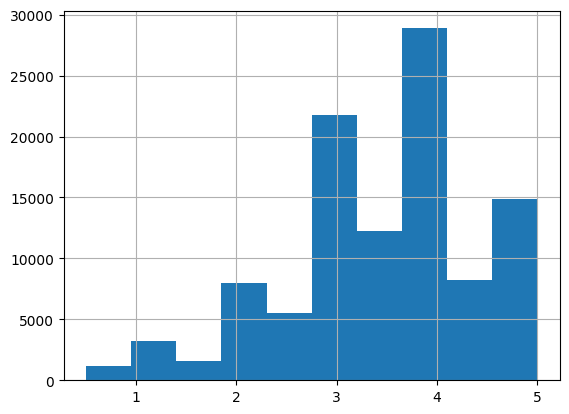

In [132]:
data['rating'].hist()

In [135]:
movie_features.sort_values(
    by='avg_rating',
    ascending=False
).head(10)

,avg_rating,rating_count,popularity_score
title,,,
Ghost in the Shell: Stand Alone Complex - The Laughing Man (2005),5.0,1,5.0
Speedy (1928),5.0,1,5.0
Cold Fever (Á köldum klaka) (1995),5.0,1,5.0
Symbol (Shinboru) (2009),5.0,1,5.0
Limelight (1952),5.0,1,5.0
"Hunchback of Notre Dame, The (Notre Dame de Paris) (1956)",5.0,1,5.0
"Women on the 6th Floor, The (Les Femmes du 6ème Étage) (2010)",5.0,1,5.0
"Saga of Gosta Berling, The (Gösta Berlings saga) (1924)",5.0,1,5.0
More (1998),5.0,1,5.0


<Axes: xlabel='genres'>

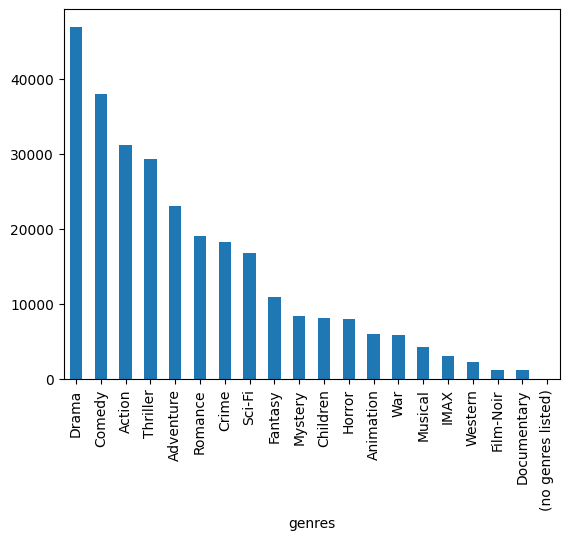

In [138]:
data.explode('genres')['genres'].value_counts().plot(kind='bar')

In [142]:
data.to_csv("processed_data.csv", index=False)

In [143]:
movie_features.to_csv("movie_features.csv")

In [145]:
import pickle

pickle.dump(
    movie_similarity_df,
    open("similarity.pkl", "wb")
)